In [17]:
! pip install matplotlib

  Using cached matplotlib-3.10.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.1.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp313-cp313-macosx_11_0_arm64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp313-cp313-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 18.6 MB/s eta 0:00:00
Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl (65 kB)
Using cached pillow-11.1.0-cp313-cp313-macosx_11_0_arm64.whl (3.1 MB)
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
  Consider adding this directory to PATH or, if you prefer to sup

In [18]:

import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


# Carga de datos

In [6]:
# Cargar las hojas del archivo en dataframes
questions_df = pd.read_excel("/Users/joshua/Documents/Proyectos/alien_case/alien_case___space_case.xlsx", sheet_name="Question")
cohort_data_df = pd.read_excel("/Users/joshua/Documents/Proyectos/alien_case/alien_case___space_case.xlsx", sheet_name="Cohort Data")
high_level_data_df = pd.read_excel("/Users/joshua/Documents/Proyectos/alien_case/alien_case___space_case.xlsx", sheet_name="High Level Data")

# Mostrar una vista previa de cada hoja para entender su contenido
questions_df.head(), cohort_data_df.head(), high_level_data_df.head()


(   Unnamed: 0                                         Unnamed: 1
 0         NaN                                                NaN
 1         NaN                                                NaN
 2         NaN                                                NaN
 3         NaN                                                NaN
 4         NaN  Context:  Imagine a world where we have discov...,
   Unnamed: 0 Summarized dataset         Unnamed: 2  \
 0        NaN                NaN                NaN   
 1        NaN                NaN                NaN   
 2        NaN             Cohort  SHIP_SAFETY_SCORE   
 3    2116-11             211611         (650, 675]   
 4    2116-11             211611         (650, 675]   
 
                        Unnamed: 3   Unnamed: 4     Unnamed: 5  Unnamed: 6  \
 0                             NaN          NaN            NaN         NaN   
 1                             NaN          NaN            NaN         NaN   
 2  Months Since Arriving on Earth  A

# Estructura de Datos

In [7]:
questions_df.drop(columns=["Unnamed: 0"], inplace=True)

## Preguntas

In [8]:
questions_df = questions_df[5:]

In [9]:
print(questions_df.iloc[0].values)
print(questions_df.iloc[1].values)
print(questions_df.iloc[2].values)
print(questions_df.iloc[3].values)

['Your job:  You have been hired as an analyst (or "alienyst") to ensure the model and policies on allowing aliens to enter Earth is working as intended.  If the model or policies are not working as intended, it is your job to fix it!']
['Issue:  On the tab "high level data", you can see that the percentage of alien ships breaking down on Earth has been rising.  Someone in the media got ahold of this chart.  Now, humans and aliens are concerned about aliens visiting!']
['Ask: Create a short presentation (~4 to 6 slides) to explain if we should be concerned about what is hapening and how we should react.  You may use the data from "Cohort Data" and "High Level Data" tabs.  Consider overall impacts, policy changes, future analysis/next steps, data issues, etc.  Given the case is ficticous, please do not consider political fallout, moral implicatioins, etc.']
['Caveat: The numbers in this case are purely ficticious. There is no connection to reality. This case has simply been designed for

## Cohort Data

In [10]:
cohort_data_df.columns = cohort_data_df.iloc[2]
ch_df = cohort_data_df.iloc[3:].reset_index(drop=True)
ch_df = ch_df[['Cohort', 'SHIP_SAFETY_SCORE', 'Months Since Arriving on Earth', 'Alien Ships', 'Ships Damaged']]
ch_df.columns = ['cohort', 'score', 'months', 'ships', 'damaged']
ch_df['months'] =  pd.to_numeric(ch_df['months'], errors='coerce')
ch_df['ships'] =  pd.to_numeric(ch_df['ships'], errors='coerce')
ch_df['damaged'] =  pd.to_numeric(ch_df['damaged'], errors='coerce')

In [11]:
ch_df.head()

,cohort,score,months,ships,damaged
0,211611,"(650, 675]",0,1324,0
1,211611,"(650, 675]",1,1324,0
2,211611,"(650, 675]",2,1324,13
3,211611,"(650, 675]",3,1324,29
4,211611,"(650, 675]",4,1324,40


## High Level Data

In [12]:
high_level_data_df.columns = ['del','month', 'repair_perc']
hl_df = high_level_data_df.loc[1:,['month', 'repair_perc']].reset_index(drop=True)

In [13]:
hl_df.head()

,month,repair_perc
0,2114-09-01 00:00:00,0.003797
1,2114-10-01 00:00:00,0.000883
2,2114-11-01 00:00:00,0.001799
3,2114-12-01 00:00:00,0.00159
4,2115-01-01 00:00:00,0.001492


In [14]:
hl_df['month'] =  pd.to_datetime(hl_df['month'], errors='coerce')
hl_df['repair_perc'] =  pd.to_numeric(hl_df['repair_perc'], errors='coerce')

In [15]:

# Visualizar los datos estructurados
import ace_tools as tools
tools.display_dataframe_to_user(name="Cohort Data Cleaned", dataframe=ch_df)
tools.display_dataframe_to_user(name="High Level Data Cleaned", dataframe=hl_df)

ModuleNotFoundError: No module named 'ace_tools'

# Analisis Exploratorio de Datos

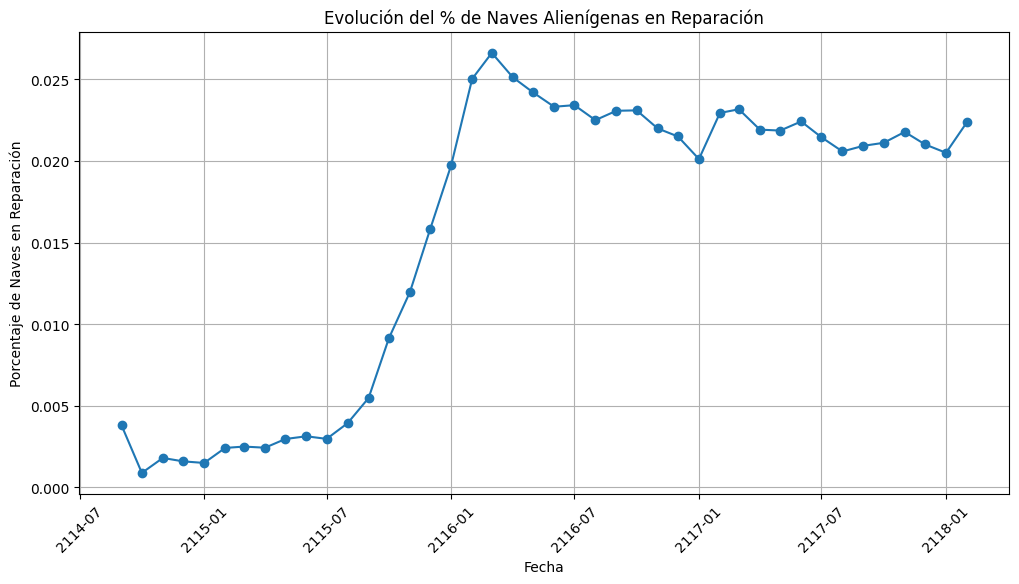

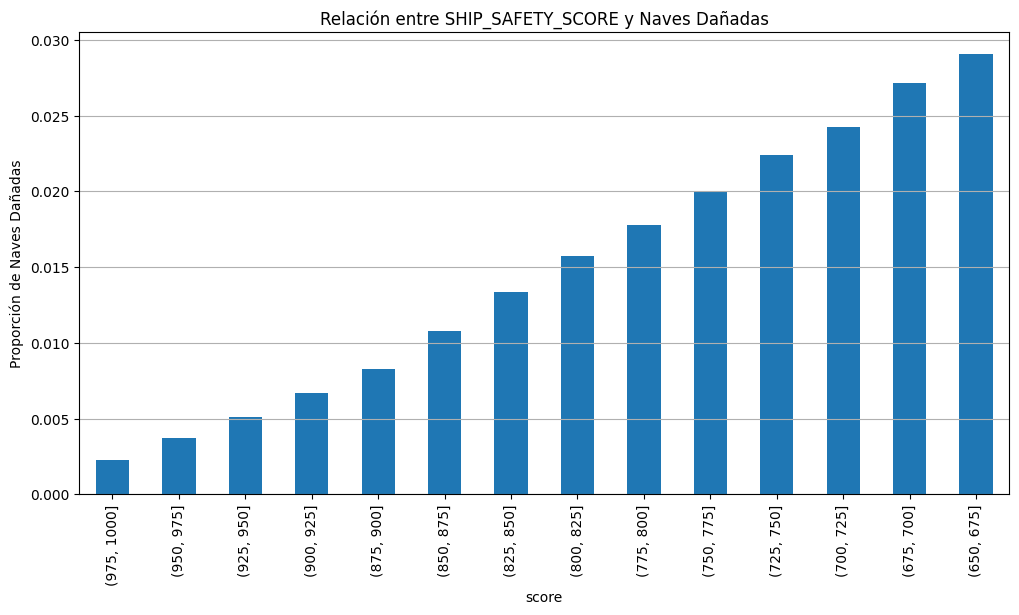

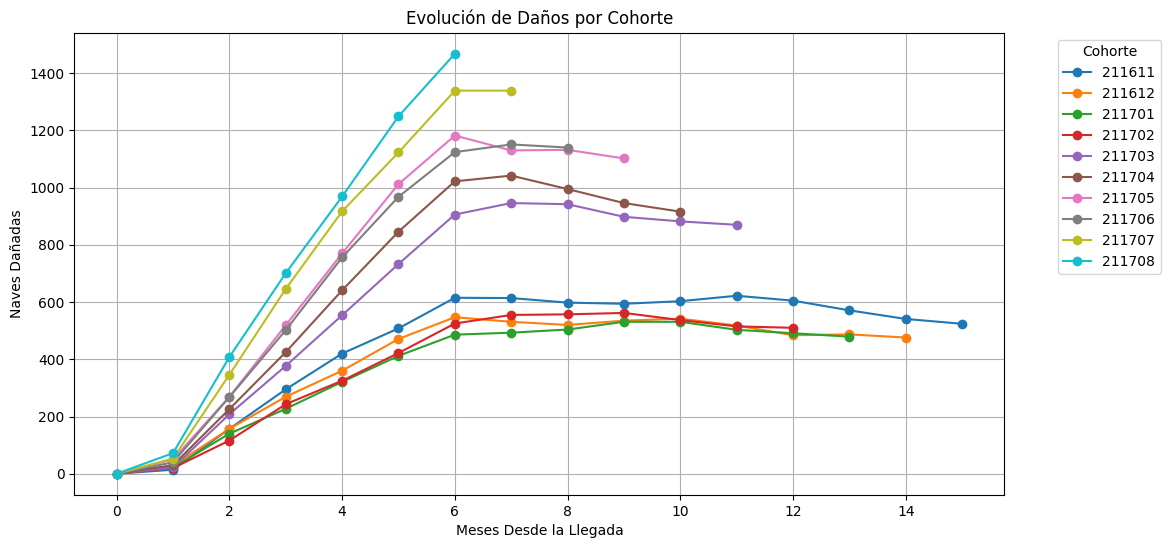

In [20]:


# 1. Distribución de daños en las naves a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(hl_df["month"], hl_df["repair_perc"], marker='o', linestyle='-')
plt.xlabel("Fecha")
plt.ylabel("Porcentaje de Naves en Reparación")
plt.title("Evolución del % de Naves Alienígenas en Reparación")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# 2. Distribución de SHIP_SAFETY_SCORE y probabilidad de daño
safety_damage_df = ch_df.groupby("score")["damaged"].sum() / ch_df.groupby("score")["ships"].sum()

plt.figure(figsize=(12, 6))
safety_damage_df.sort_values().plot(kind="bar")
plt.xlabel("score")
plt.ylabel("Proporción de Naves Dañadas")
plt.title("Relación entre SHIP_SAFETY_SCORE y Naves Dañadas")
plt.grid(axis="y")
plt.show()

# 3. Evolución del daño en cohortes
cohort_damage_trend = ch_df.groupby(["cohort", "months"])["damaged"].sum().unstack()

plt.figure(figsize=(12, 6))
for cohort in cohort_damage_trend.index[:10]:  # Mostrar solo las primeras 10 cohortes para legibilidad
    plt.plot(cohort_damage_trend.columns, cohort_damage_trend.loc[cohort], marker='o', linestyle='-', label=cohort)

plt.xlabel("Meses Desde la Llegada")
plt.ylabel("Naves Dañadas")
plt.title("Evolución de Daños por Cohorte")
plt.legend(title="Cohorte", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
